# Multilayer perceptron back propagation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = np.asarray(pd.read_csv("training_data.csv"))
y_train = np.asarray(pd.read_csv("training_label.csv"))
X_test = np.asarray(pd.read_csv("testing_data.csv"))
y_test = np.asarray(pd.read_csv("testing_label.csv"))

In [3]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [4]:
def z_score(x, axis):
    xr = np.rollaxis(x, axis=axis)
    xr -= np.mean(x, axis=axis)
    xr /= np.std(x, axis=axis)
    # print(x)
    return x

In [5]:
X_train = z_score(X_train,0)
X_test = z_score(X_test,0)

In [6]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [8]:
# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=60, batch_size=128, validation_split=0.2, verbose=2, shuffle=True) 

Train on 289 samples, validate on 73 samples
Epoch 1/60
 - 0s - loss: -3.9794e+00 - accuracy: 0.4394 - val_loss: 0.9798 - val_accuracy: 0.3288
Epoch 2/60
 - 0s - loss: -3.8809e+00 - accuracy: 0.4740 - val_loss: 0.9981 - val_accuracy: 0.3288
Epoch 3/60
 - 0s - loss: -3.9581e+00 - accuracy: 0.4533 - val_loss: 1.0494 - val_accuracy: 0.3425
Epoch 4/60
 - 0s - loss: -3.6115e+00 - accuracy: 0.4533 - val_loss: 1.2085 - val_accuracy: 0.3425
Epoch 5/60
 - 0s - loss: -3.6757e+00 - accuracy: 0.4533 - val_loss: 1.3466 - val_accuracy: 0.3425
Epoch 6/60
 - 0s - loss: -3.6701e+00 - accuracy: 0.4602 - val_loss: 1.2000 - val_accuracy: 0.3425
Epoch 7/60
 - 0s - loss: -3.4386e+00 - accuracy: 0.4533 - val_loss: 1.2064 - val_accuracy: 0.3425
Epoch 8/60
 - 0s - loss: -3.6052e+00 - accuracy: 0.4325 - val_loss: 1.1940 - val_accuracy: 0.3425
Epoch 9/60
 - 0s - loss: -3.9515e+00 - accuracy: 0.4464 - val_loss: 1.1812 - val_accuracy: 0.3425
Epoch 10/60
 - 0s - loss: -3.8530e+00 - accuracy: 0.4256 - val_loss: 1.17

In [21]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               1300      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 11,501
Trainable params: 11,501
Non-trainable params: 0
_________________________________________________________________
None


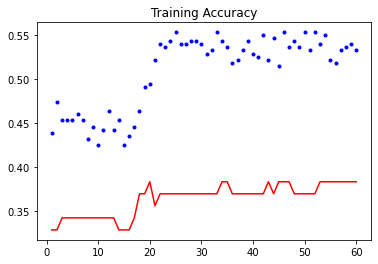

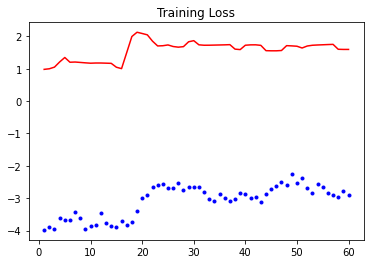

In [22]:
# Plot the training accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs, val_acc,'r')
plt.plot(epochs, acc,'b.')
plt.title("Training Accuracy")
plt.show()

plt.figure()
plt.plot(epochs, val_loss,'r')
plt.plot(epochs,loss,'b.')
plt.title("Training Loss")
plt.show()

In [24]:
y_train_pred = np.sign(model.predict(X_train))
error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_train, y_train_pred))]
err_rate = sum(error_vec)/len(y_train)
print("Training Accuracy:", (1- err_rate)*100, "%")

Training Accuracy: 61.87845303867403 %


In [25]:
# print(np.hstack((y_train, y_train_pred)))

In [26]:
Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_train, y_train_pred))]
sq_err = sum(Sq_err_vec)/len(y_train)
print("Training square error:",sq_err)

Training square error: 1.5248618784530388


In [31]:
y_test_pred = np.sign(model.predict(X_test))
test_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_test, y_test_pred))]
test_err_rate = sum(test_error_vec)/len(y_test)
print("Testing Accuracy:", (1- test_err_rate)*100, "%")

Testing Accuracy: 59.96774193548382 %


In [32]:
test_Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_test, y_test_pred))]
test_sq_err = sum(test_Sq_err_vec)/len(y_test)
print("Testing square error:",test_sq_err)

Testing square error: 1.8838709677419354


# Feature Selection

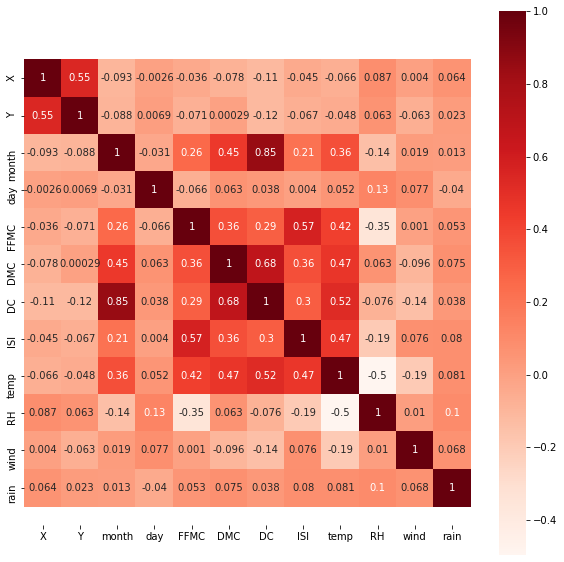

In [22]:
X_train_ = pd.read_csv("training_data.csv")
y_train_ = pd.read_csv("training_label.csv")
cor = X_train_.corr()

fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_, y_train_)

c:\users\50221\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000014EFF4884C8>)

In [24]:
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (X_train_.columns[i], fs.scores_[i]))

Feature X: 0.000000
Feature Y: 0.002052
Feature month: 0.024414
Feature day: 0.000000
Feature FFMC: 0.000000
Feature DMC: 0.007282
Feature DC: 0.017781
Feature ISI: 0.000000
Feature temp: 0.000000
Feature RH: 0.026152
Feature wind: 0.003029
Feature rain: 0.000000


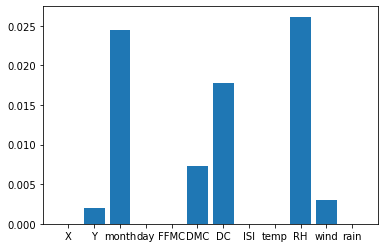

In [25]:
plt.figure()
plt.bar(X_train_.columns, fs.scores_)
plt.show()

In [26]:
features_selected = ["month","DMC","DC","RH","wind"]

In [27]:
X_train1 = pd.read_csv("training_data.csv")[features_selected]
y_train1 = pd.read_csv("training_label.csv")
X_test1 = pd.read_csv("testing_data.csv")[features_selected]
y_test1 = pd.read_csv("testing_label.csv")

In [28]:
X_train1

,month,DMC,DC,RH,wind
0,7,62.3,442.9,36,3.1
1,9,117.9,668.0,34,5.8
2,2,6.6,18.7,35,3.1
3,5,28.0,113.8,94,4.9
4,9,117.9,668.0,33,5.4
...,...,...,...,...,...
357,8,130.3,587.1,40,5.8
358,9,121.1,674.4,46,1.8
359,3,30.7,74.3,29,3.1
360,3,48.3,97.8,27,7.6


In [29]:
X_tr1 = np.asarray(X_train1)
y_tr1 = np.asarray(y_train1)
X_te1 = np.asarray(X_test1)
y_te1 = np.asarray(y_test1)

In [30]:
X_tr1 = z_score(X_tr1,0)
X_te1 = z_score(X_te1,0)

In [56]:
model2 = Sequential()
model2.add(Dense(100, input_dim=X_tr1.shape[1], activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='tanh'))

In [57]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
feature_select = model2.fit(X_tr1, y_tr1, epochs=100, batch_size=128, validation_split=0.2, verbose=2, shuffle=True) 

Train on 289 samples, validate on 73 samples
Epoch 1/100
 - 0s - loss: -2.8134e+00 - accuracy: 0.3702 - val_loss: 2.1941 - val_accuracy: 0.1918
Epoch 2/100
 - 0s - loss: -2.4584e+00 - accuracy: 0.3460 - val_loss: 2.2238 - val_accuracy: 0.2055
Epoch 3/100
 - 0s - loss: -2.0330e+00 - accuracy: 0.3668 - val_loss: 1.9470 - val_accuracy: 0.2055
Epoch 4/100
 - 0s - loss: -2.3327e+00 - accuracy: 0.3945 - val_loss: 1.9445 - val_accuracy: 0.2055
Epoch 5/100
 - 0s - loss: -2.4075e+00 - accuracy: 0.3391 - val_loss: 1.9857 - val_accuracy: 0.2055
Epoch 6/100
 - 0s - loss: -2.5391e+00 - accuracy: 0.3599 - val_loss: 2.0223 - val_accuracy: 0.2055
Epoch 7/100
 - 0s - loss: -2.1086e+00 - accuracy: 0.3564 - val_loss: 1.9788 - val_accuracy: 0.2055
Epoch 8/100
 - 0s - loss: -2.2637e+00 - accuracy: 0.3806 - val_loss: 1.8469 - val_accuracy: 0.2055
Epoch 9/100
 - 0s - loss: -2.3994e+00 - accuracy: 0.3668 - val_loss: 1.9232 - val_accuracy: 0.2192
Epoch 10/100
 - 0s - loss: -2.5358e+00 - accuracy: 0.3875 - val_

Epoch 83/100
 - 0s - loss: -2.2066e+00 - accuracy: 0.4083 - val_loss: 0.7046 - val_accuracy: 0.2740
Epoch 84/100
 - 0s - loss: -2.4858e+00 - accuracy: 0.4083 - val_loss: 0.7103 - val_accuracy: 0.2740
Epoch 85/100
 - 0s - loss: -2.3272e+00 - accuracy: 0.3945 - val_loss: 0.7141 - val_accuracy: 0.2740
Epoch 86/100
 - 0s - loss: -2.5090e+00 - accuracy: 0.4048 - val_loss: 0.7179 - val_accuracy: 0.2740
Epoch 87/100
 - 0s - loss: -2.4901e+00 - accuracy: 0.3979 - val_loss: 0.7227 - val_accuracy: 0.2740
Epoch 88/100
 - 0s - loss: -2.4303e+00 - accuracy: 0.3945 - val_loss: 0.7293 - val_accuracy: 0.2740
Epoch 89/100
 - 0s - loss: -2.4391e+00 - accuracy: 0.4256 - val_loss: 0.7331 - val_accuracy: 0.2740
Epoch 90/100
 - 0s - loss: -2.4610e+00 - accuracy: 0.4014 - val_loss: 0.7348 - val_accuracy: 0.2877
Epoch 91/100
 - 0s - loss: -2.3493e+00 - accuracy: 0.4394 - val_loss: 0.7403 - val_accuracy: 0.2877
Epoch 92/100
 - 0s - loss: -2.3725e+00 - accuracy: 0.4048 - val_loss: 0.8790 - val_accuracy: 0.2877


In [66]:
y_train_pred = np.sign(model2.predict(X_tr1))
error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_tr1, y_train_pred))]
err_rate = sum(error_vec)/len(y_tr1)
print("Training Accuracy:", (1- err_rate)*100, "%")

Training Accuracy: 61.04972375690607 %


In [70]:
print(np.hstack((y_tr1, y_train_pred)))

[[-1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [-1.  1.]
 [-1. -1.]
 [ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1. -1.]
 [-1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 [ 1.  1.]
 [-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1. -1.]

In [67]:
Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_tr1, y_train_pred))]
sq_err = sum(Sq_err_vec)/len(y_tr1)
print("Training square error:",sq_err)

Training square error: 1.558011049723757


In [68]:
y_test_pred = np.sign(model2.predict(X_te1))
test_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_te1, y_test_pred))]
test_err_rate = sum(test_error_vec)/len(y_te1)
print("Testing Accuracy:", (1- test_err_rate)*100, "%")

Testing Accuracy: 52.25806451612903 %


In [69]:
test_Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_te1, y_test_pred))]
test_sq_err = sum(test_Sq_err_vec)/len(y_test)
print("Testing square error:",test_sq_err)

Testing square error: 1.9096774193548387


# K-fold validation

In [42]:
n_train = len(X_train)

k_fold = 5
id_train = [[]] * k_fold
id_val = [[]] * k_fold

for m in range(k_fold):
    id_val[m] = range(m, n_train, k_fold) # Indices of k_fold validation sets.
    id_train[m] = np.setdiff1d(range(n_train), id_val[m])

In [43]:
CMat_train_best = None
CMat_val_best = None
acc_train_best = 0
acc_val_best = 0
model_best = None
Val_acc = []

In [44]:
from sklearn.metrics import confusion_matrix
# ConfusionMatrix = np.zeros((2,2), dtype=int)

for m in range(k_fold):
    print("\n iteration", m)
    X_train_cur = X_train[id_train[m]]
    y_train_cur = y_train[id_train[m]]
    X_val_cur = X_train[id_val[m]]
    y_val_cur = y_train[id_val[m]]

    mlp = Sequential()
    mlp.add(Dense(100, input_dim=X_train_cur.shape[1], activation='relu'))
    mlp.add(Dense(100, activation='relu'))
    mlp.add(Dropout(0.2))
    mlp.add(Dense(1, activation='tanh'))
    
    mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    mlp.fit(X_train_cur, y_train_cur, epochs=200, batch_size=128,verbose=0, shuffle=True) 
    
    y_pred_train_cur = np.sign(mlp.predict(X_train_cur))
    y_pred_val_cur = np.sign(mlp.predict(X_val_cur))
    
    CMat_train = confusion_matrix(y_train_cur, np.round(y_pred_train_cur,0), labels=[-1,1])
    acc_train = np.sum(np.diag(CMat_train))/np.shape(X_train_cur)[0]
    
    CMat_val = confusion_matrix(y_val_cur, np.round(y_pred_val_cur,0), labels=[-1,1])
    acc_val = np.sum(np.diag(CMat_val))/np.shape(X_val_cur)[0]
    Val_acc.append(acc_val)
    
    if acc_val > acc_val_best:
        acc_train_best = acc_train
        acc_val_best = acc_val
        model_best =  mlp
        CMat_train_best = CMat_train
        CMat_val_best = CMat_val
    
    print("Training confusion matrix:\n", CMat_train)
    print("Training accuracy:", acc_train)
    print("Validation confusion matrix:\n", CMat_val)
    print("Validation accuracy:", acc_val)


 iteration 0
Training confusion matrix:
 [[136  22]
 [ 89  42]]
Training accuracy: 0.615916955017301
Validation confusion matrix:
 [[25  8]
 [33  7]]
Validation accuracy: 0.4383561643835616

 iteration 1
Training confusion matrix:
 [[146   4]
 [116  23]]
Training accuracy: 0.5847750865051903
Validation confusion matrix:
 [[38  3]
 [25  7]]
Validation accuracy: 0.6164383561643836

 iteration 2
Training confusion matrix:
 [[75 81]
 [42 92]]
Training accuracy: 0.5758620689655173
Validation confusion matrix:
 [[12 23]
 [13 24]]
Validation accuracy: 0.5

 iteration 3
Training confusion matrix:
 [[112  41]
 [ 42  95]]
Training accuracy: 0.7137931034482758
Validation confusion matrix:
 [[23 15]
 [21 13]]
Validation accuracy: 0.5

 iteration 4
Training confusion matrix:
 [[100  47]
 [ 53  90]]
Training accuracy: 0.6551724137931034
Validation confusion matrix:
 [[20 24]
 [12 16]]
Validation accuracy: 0.5


In [45]:
print("Highest training accuracy:", acc_train_best)
print("Best training confusion matrix:\n", CMat_train_best)
print("Highest validation accuracy:", acc_val_best)
print("Best validation confusion matrix:\n", CMat_val_best)
print("Average validation accuracy:", sum(Val_acc)/k_fold)
print(model_best)

Highest training accuracy: 0.5847750865051903
Best training confusion matrix:
 [[146   4]
 [116  23]]
Highest validation accuracy: 0.6164383561643836
Best validation confusion matrix:
 [[38  3]
 [25  7]]
Average validation accuracy: 0.5109589041095891


In [46]:
y_test_pred = np.sign(model_best.predict(X_test))
test_error_vec = [0 if k[0]==k[1] else 1 for k in np.hstack((y_test, y_test_pred))]
test_err_rate = sum(test_error_vec)/len(y_test)
print("Testing Accuracy:", (1-test_err_rate)*100, "%")

Testing Accuracy: 52.25806451612903 %


In [47]:
test_Sq_err_vec = [ (it[0]-it[1])**2 for it in np.hstack((y_test, y_test_pred))]
test_sq_err = sum(test_Sq_err_vec)/len(y_test)
print("Testing square error:",test_sq_err)

Testing square error: 1.9096774193548387
